<a href="https://colab.research.google.com/github/apurvakumbhar/Computer_vision/blob/main/cv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


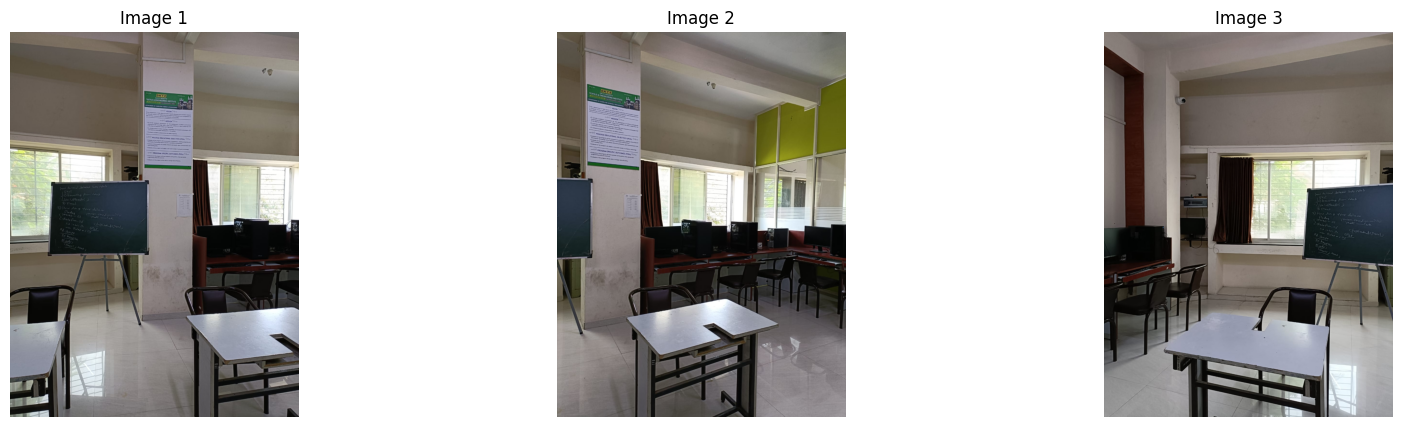

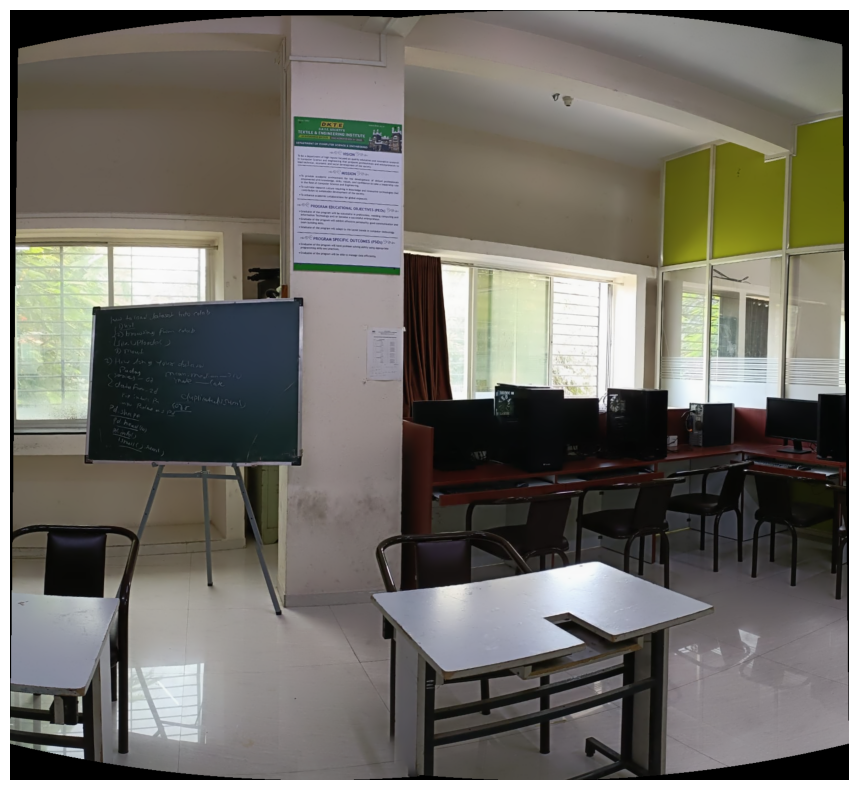

Panorama saved at /content/drive/MyDrive/ComputerVision/panorama/*.jpg


In [ ]:
#Image Stitching and Panorama creation using OpenCV Stitcher

import cv2, glob
from matplotlib import pyplot as plt

# 1. Load images (ensure left-to-right order)
folder = "/content/drive/MyDrive/ComputerVision/panorama/*.jpg"
images = [cv2.imread(f) for f in sorted(glob.glob(folder))]

# 2. Create OpenCV Stitcher
stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)

# 3. Stitch images
status, panorama = stitcher.stitch(images)

# 4. Check for success
if status != cv2.Stitcher_OK:
    print("Error during stitching:", status)
else:
    # 5. Convert BGR->RGB for matplotlib
    panorama_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)

    # 6. Display Input images
    plt.figure(figsize=(20,5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i+1)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f"Image {i+1}")
    plt.show()

    # 6. Display Output images
    plt.figure(figsize=(20,10))
    plt.imshow(panorama_rgb)
    plt.axis('off')
    plt.show()

    # 7. Save result
    cv2.imwrite("/content/drive/MyDrive/ComputerVision/panorama/*.jpg", panorama)
    print("Panorama saved at /content/drive/MyDrive/ComputerVision/panorama/*.jpg")